# Exploratory Data Analysis


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sm
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path # to interact with file system.

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from pandas.plotting import scatter_matrix, parallel_coordinates

warnings.filterwarnings("ignore")
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn import metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df= pd.read_csv('C:/Users/STSC/Downloads/cleaned_dataRedfinBAN612.csv')
df

,Unnamed: 0,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,0,848000,2.0,2.0,1124.0,"5,200",38740 Tyson Ln Unit 316B,Fremont,94536,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/38740-Tyson-...
1,1,349000,2.0,1.0,800.0,"5,200",1106 83rd Ave,Oakland,94621,Alameda Conty,CA,https://www.redfin.com/CA/Oakland/1106-83rd-Av...
2,2,725000,2.0,1.0,1134.0,"4,500",22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,3,1373888,3.0,2.5,1952.0,"3,340",21279 Highland Dr,Castro Valley,94552,Alameda Conty,CA,https://www.redfin.com/CA/Castro-Valley/21279-...
4,4,489000,2.0,1.0,936.0,"4,000",3402 Pinewood Ter #311,Fremont,94536,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/3402-Pinewoo...
...,...,...,...,...,...,...,...,...,...,...,...,...
517,517,3900000,3.0,2.5,2368.0,13503.6,333 Mission Vineyard Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/33...
518,518,699900,2.0,1.0,1074.0,13503.6,7530 Lovers Ln,Hollister,95023,sanBenito County,CA,https://www.redfin.com/CA/Hollister/7530-Lover...
519,519,839000,4.0,2.5,2178.0,"3,932",1590 Bundeson Cir #3,Hollister,95023,sanBenito County,CA,https://www.redfin.com/CA/Hollister/1590-Bunde...
520,520,3299800,5.0,5.0,5450.0,5602687.2,3000 San Juan Canyon Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/30...


In [4]:
del df['Unnamed: 0']

In [5]:
df

,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,848000,2.0,2.0,1124.0,"5,200",38740 Tyson Ln Unit 316B,Fremont,94536,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/38740-Tyson-...
1,349000,2.0,1.0,800.0,"5,200",1106 83rd Ave,Oakland,94621,Alameda Conty,CA,https://www.redfin.com/CA/Oakland/1106-83rd-Av...
2,725000,2.0,1.0,1134.0,"4,500",22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,1373888,3.0,2.5,1952.0,"3,340",21279 Highland Dr,Castro Valley,94552,Alameda Conty,CA,https://www.redfin.com/CA/Castro-Valley/21279-...
4,489000,2.0,1.0,936.0,"4,000",3402 Pinewood Ter #311,Fremont,94536,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/3402-Pinewoo...
...,...,...,...,...,...,...,...,...,...,...,...
517,3900000,3.0,2.5,2368.0,13503.6,333 Mission Vineyard Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/33...
518,699900,2.0,1.0,1074.0,13503.6,7530 Lovers Ln,Hollister,95023,sanBenito County,CA,https://www.redfin.com/CA/Hollister/7530-Lover...
519,839000,4.0,2.5,2178.0,"3,932",1590 Bundeson Cir #3,Hollister,95023,sanBenito County,CA,https://www.redfin.com/CA/Hollister/1590-Bunde...
520,3299800,5.0,5.0,5450.0,5602687.2,3000 San Juan Canyon Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/30...


In [6]:
#The predictor variables that we are planning to consider are BHK, Size, Area type, City, Furnishing status, Bathroom.
# Categorical variables like Furnishing Status, Area type, and City can have an influence on the rent
df.dtypes

House_Price      int64
Beds           float64
Baths          float64
Area           float64
Lot             object
Street          object
City            object
Zip_Code         int64
County          object
State           object
Url             object
dtype: object

In [7]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
        House_Price        Beds       Baths          Area      Zip_Code
count  5.220000e+02  522.000000  522.000000    522.000000    522.000000
mean   1.383887e+06    3.260536    2.444923   2029.249042  94784.563218
std    1.304743e+06    1.218950    1.084587   1262.567335    394.491369
min    2.300000e+03    0.000000    1.000000    500.000000  94002.000000
25%    7.250000e+05    3.000000    2.000000   1304.250000  94544.250000
50%    9.950000e+05    3.000000    2.375000   1799.500000  94941.000000
75%    1.500000e+06    4.000000    3.000000   2379.250000  95023.000000
max    1.150000e+07   16.000000   16.000000  15105.000000  95694.000000


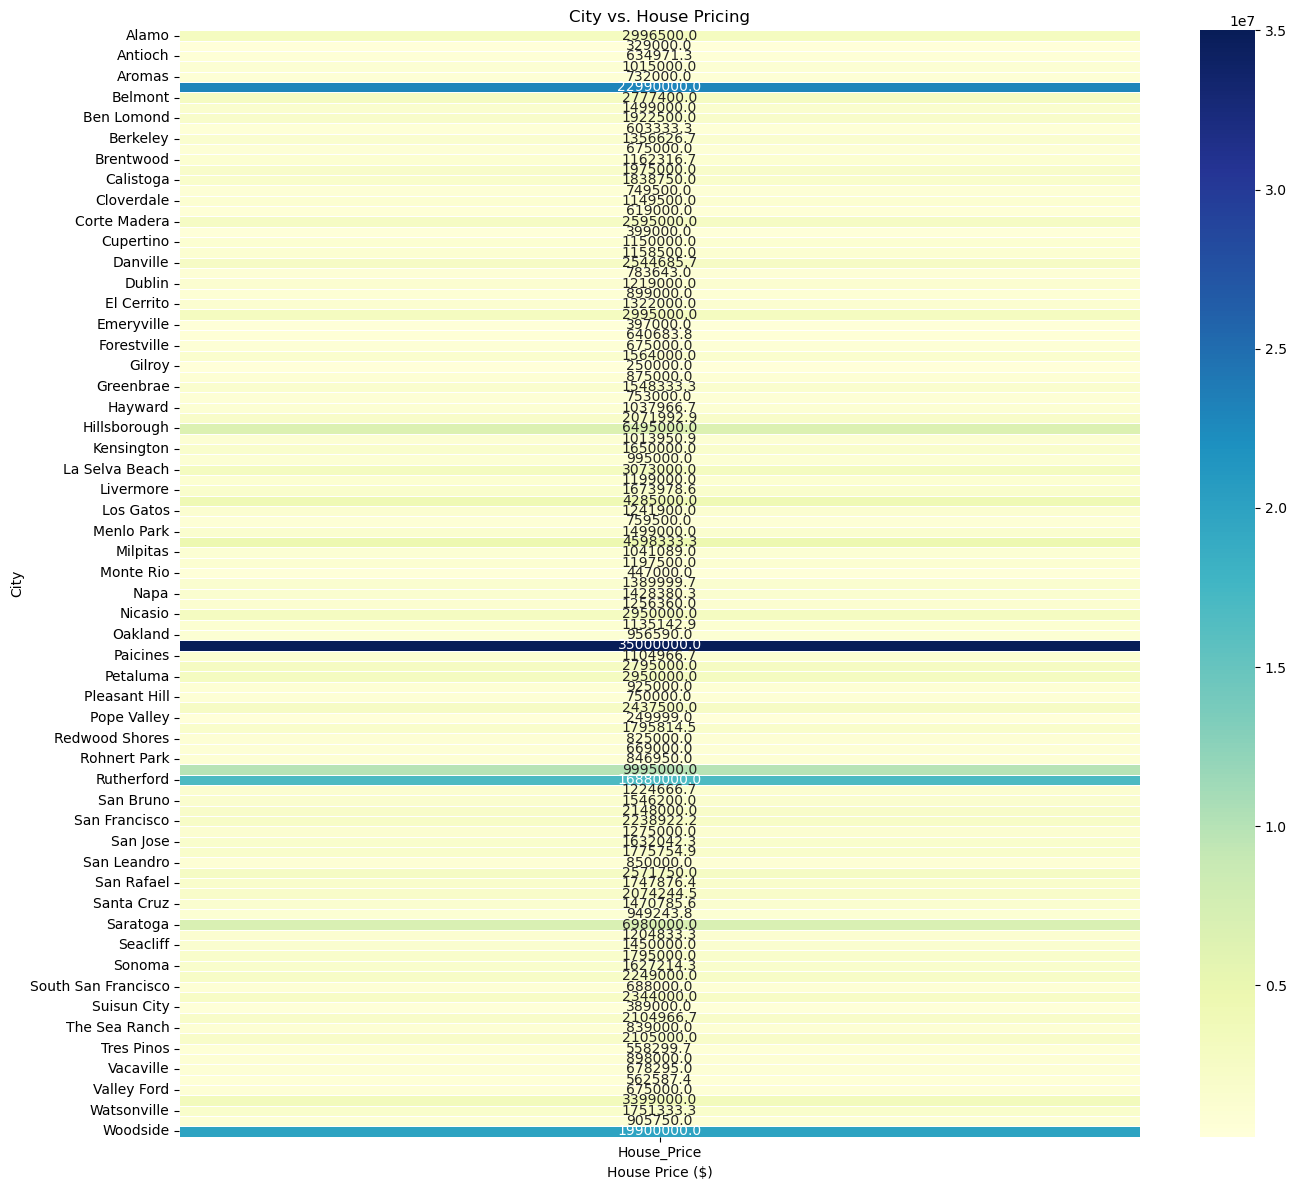

In [6]:
# Define the function to plot city price heatmap
def plot_city_price_heatmap(city_data):
    """
    Plots a heatmap showing the relationship between cities and house pricing.
    
    Args:
    city_data (pandas DataFrame): The input data containing 'City' and 'House_Price' columns.
    """
    # Pivot the data to prepare for heatmap
    pivot_data = city_data.pivot_table(index='City', values='House_Price', aggfunc='mean')
    
    # Plot heatmap
    plt.figure(figsize=(14, 12))
    sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
    plt.title('City vs. House Pricing')
    plt.xlabel('House Price ($)')
    plt.ylabel('City')
    plt.tight_layout()
    plt.show()


# Call the function to plot the heatmap using the loaded data
plot_city_price_heatmap(df)

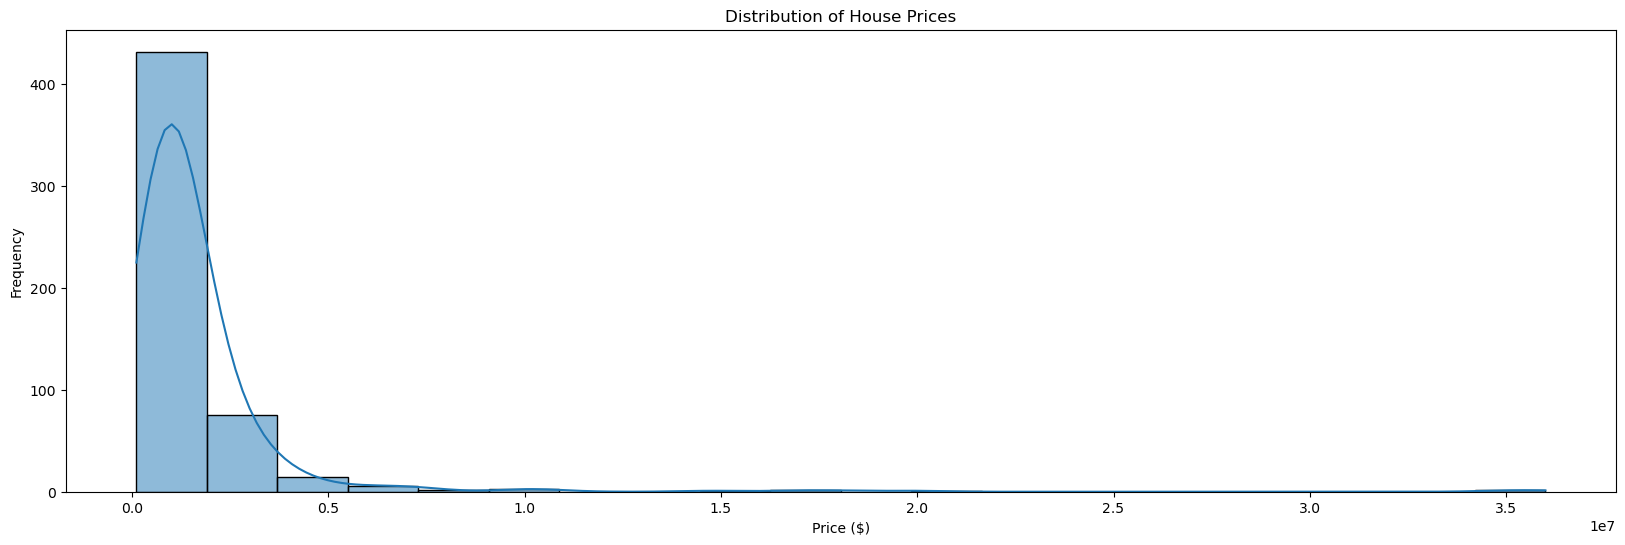

In [7]:
# Data visualization
# Histogram of house prices
plt.figure(figsize=(20, 6))
sns.histplot(df['House_Price'], bins=20, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

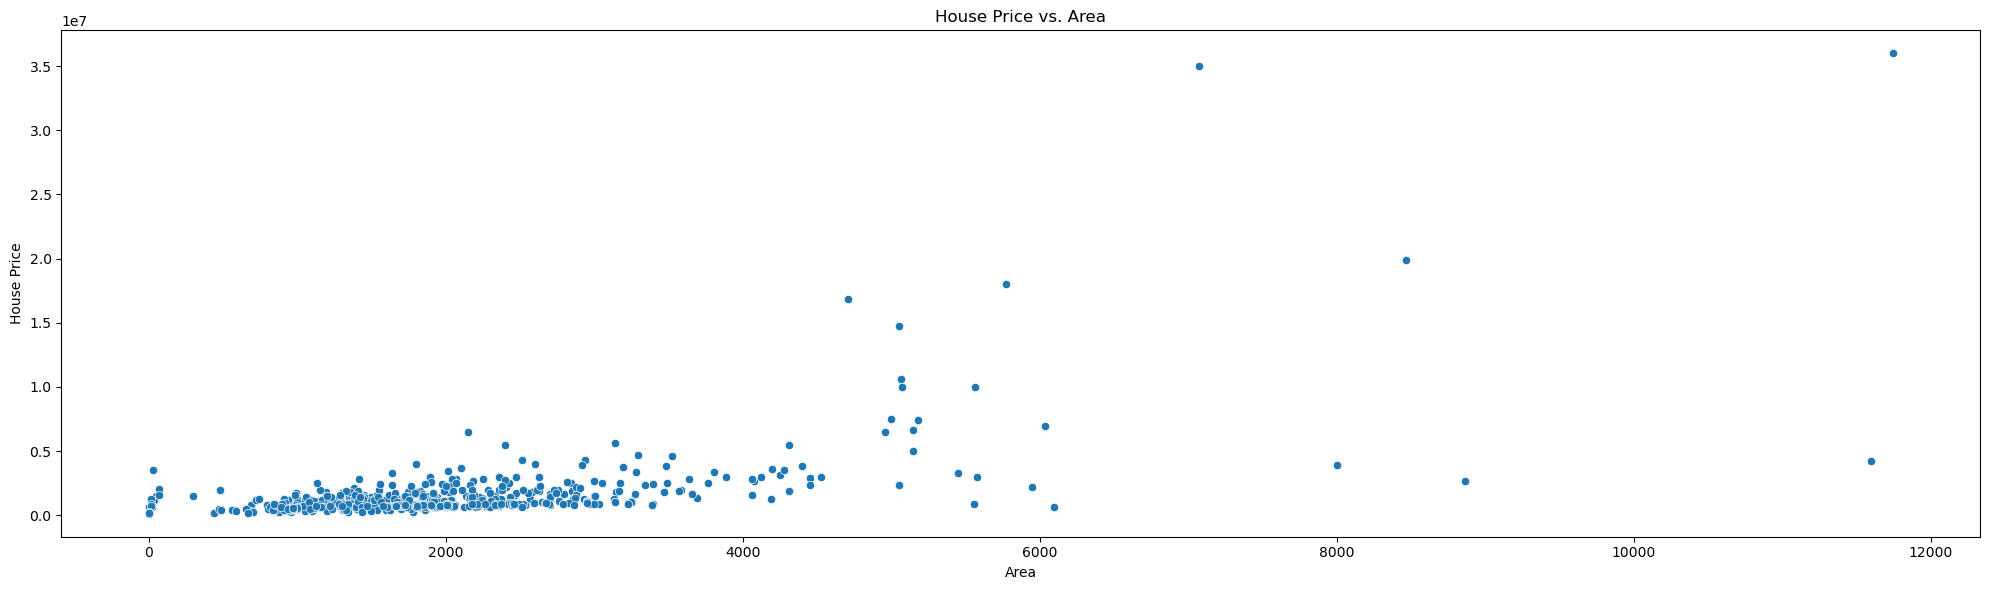

In [8]:
def plot_price_vs_area(df):
    """
    Plots the relationship between house price and area using a scatter plot.
    
    Args:
    data (pandas DataFrame): The input data containing 'House_Price' and 'Area' columns.
    """
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x=df['Area'], y=df['House_Price'])
    plt.title('House Price vs. Area')
    plt.xlabel('Area')
    plt.ylabel('House Price')
    plt.tight_layout()
    plt.show()

# Call the function to plot the relationship between house price and area
plot_price_vs_area(df)

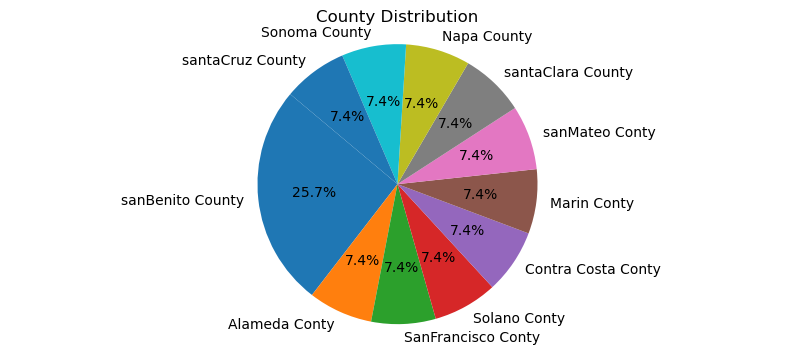

In [9]:
county_counts = df['County'].value_counts()

# Plotting
plt.figure(figsize=(10,4))  # Set the size of the figure
plt.pie(county_counts, labels=county_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('County Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

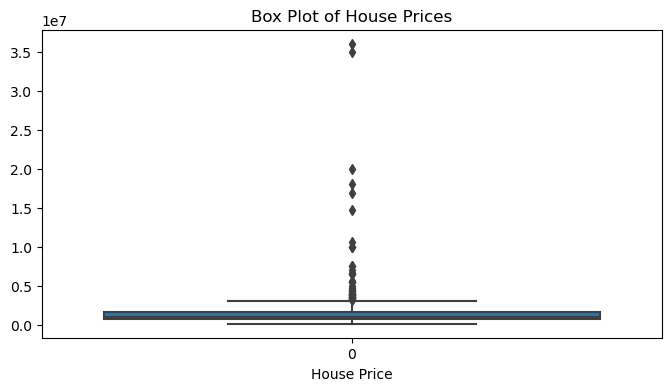

In [12]:
# Box plot of house prices
plt.figure(figsize=(8,4))
sns.boxplot(df['House_Price'])
plt.title('Box Plot of House Prices')
plt.xlabel('House Price')
plt.show()

# Regression Analysis


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [14]:
df.columns #define columns

Index(['House_Price', 'Beds', 'Baths', 'Area', 'Lot', 'Street', 'City',
       'Zip_Code', 'County', 'State', 'Url'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   House_Price  538 non-null    int64  
 1   Beds         538 non-null    float64
 2   Baths        538 non-null    float64
 3   Area         538 non-null    float64
 4   Lot          538 non-null    float64
 5   Street       538 non-null    object 
 6   City         538 non-null    object 
 7   Zip_Code     538 non-null    int64  
 8   County       538 non-null    object 
 9   State        538 non-null    object 
 10  Url          538 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 46.4+ KB


### How is the Housing Distribution affected with regards to the Bedrooms and Bathrooms?

**_Here we are trying to figure out the number or the percentage of Houses classified based on the counts of bedrooms and bathrooms each property holds distributed across all the counties._**

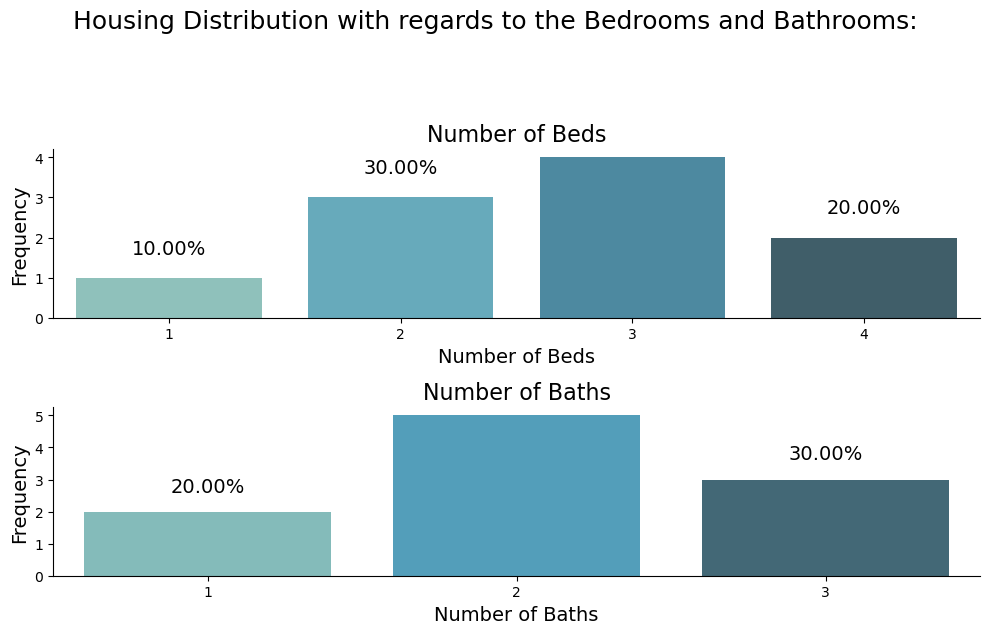

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating the dataframe
df = pd.DataFrame({
    'Beds': [1, 2, 3, 3, 2, 4, 3, 4, 3, 2],
    'Baths': [1, 2, 1, 2, 2, 3, 2, 3, 3, 2]
})

def plot_distribution(data, column, ax):
    
    counts = data[column].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, palette="GnBu_d", ax=ax)
    total = counts.sum()
    
  
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{(height/total)*100:.2f}%', (p.get_x() + p.get_width() / 2., height + 0.5), 
                    ha='center', va='bottom', fontsize=14)

    # visual elements
    ax.set_title(f"Number of {column}", fontsize=16)
    ax.set_xlabel(f"Number of {column}", fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# figures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle("Housing Distribution with regards to the Bedrooms and Bathrooms:", fontsize=18, y=1.05)

# distribution plotting
plot_distribution(df, "Beds", ax1)
plot_distribution(df, "Baths", ax2)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

**_Observation: Houses with 3 bedrooms are the most common among the listings at around 40% and houses with 2 baths are frequesntly used at around 45% as per the graphs._**

###  What are the combination of beds and baths seen more commonly in the properties across the Counties?

In [17]:
#cross-tabulation
pd.crosstab(df['Beds'], df['Baths'])

Baths,1,2,3
Beds,,,
1,1,0,0
2,0,3,0
3,1,2,1
4,0,0,2


### How is the 'Area' and the 'House_Price'related?

**_This shows how the size or area (sqft) of the house affect the Pricing_**

R-squared value: 0.00


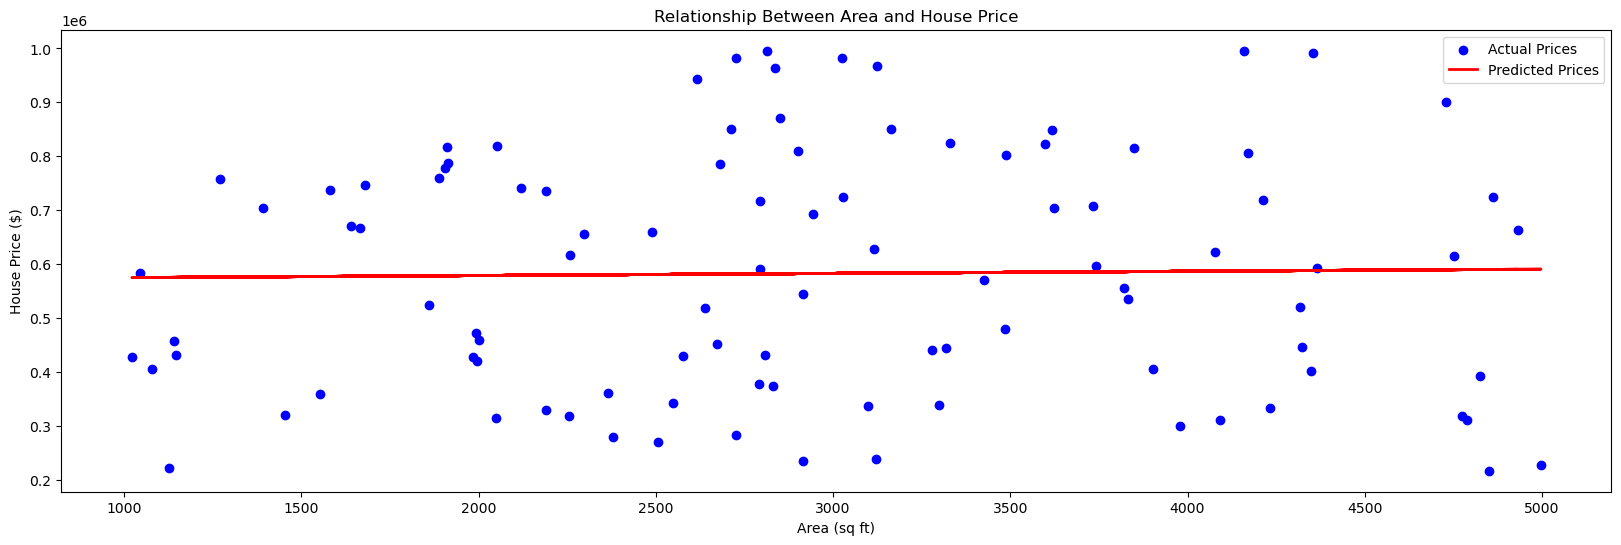

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Example DataFrame creation for demonstration purposes
data = {
    'Area': np.random.randint(1000, 5000, 100),  # Random areas between 1000 and 5000 square feet
    'House_Price': np.random.randint(200000, 1000000, 100)  # Random prices between $200k and $1M
}
df = pd.DataFrame(data)

# Extract the 'Area' and 'House_Price' columns
X = df['Area'].values.reshape(-1, 1)
y = df['House_Price'].values

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)  # Fit model to the data

# Make predictions
y_pred = model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)
print(f'R-squared value: {r2:.2f}')

# Visualize the relationship between 'Area' and 'House_Price'
plt.figure(figsize=(20, 6))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, y_pred, color='red', label='Predicted Prices', linewidth=2)
plt.title('Relationship Between Area and House Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('House Price ($)')
plt.legend()
plt.show()

In [19]:
correlation = df['Area'].corr(df['House_Price'])
correlation

0.018933958424936184

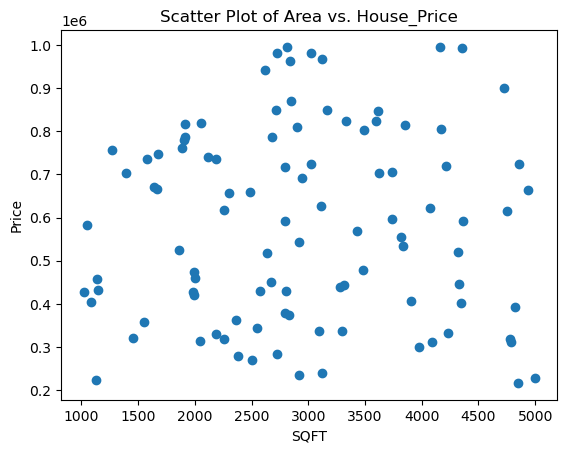

In [20]:
plt.scatter(df['Area'], df['House_Price'])
plt.xlabel('SQFT')
plt.ylabel('Price')
plt.title('Scatter Plot of Area vs. House_Price')
plt.show()

# Kmeans 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

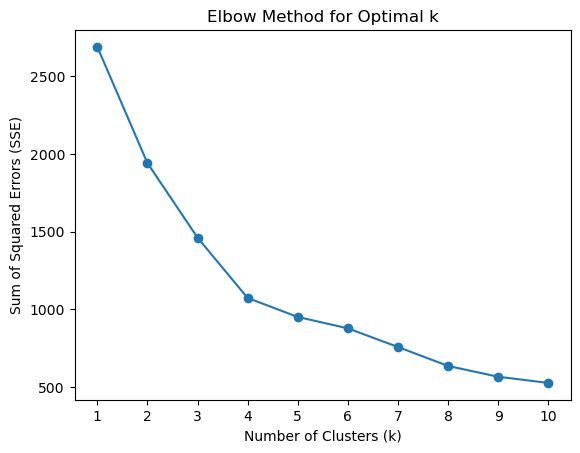

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Street', 'City', 'Zip_Code', 'County', 'State', 'Url']))

# Using Elbow Method to determine the best value of k

# Define the range of k values to test
k_values = range(1, 11)

# Initialize an empty list to store SSE values for each k
sse_values = []

# Calculate SSE for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)

# Plotting SSE values for different values of k
plt.plot(k_values, sse_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()

Number of data points in each cluster:
Cluster
1    314
0    207
2     17
Name: count, dtype: int64


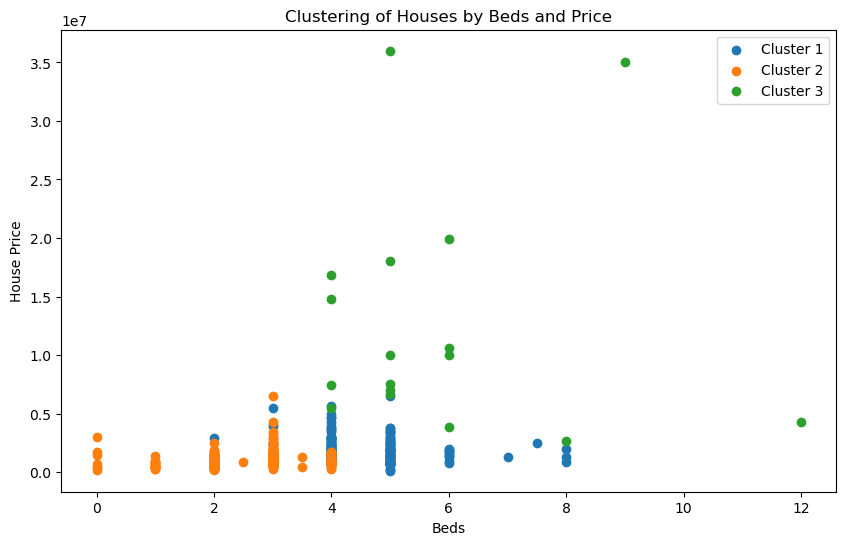

In [5]:
n_clusters = 3

# Using K-means algorithm for clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Adding the clustering results to the original data
df['Cluster'] = labels

# Outputting the number of data points in each cluster
print("Number of data points in each cluster:")
print(df['Cluster'].value_counts())

# Calculate cluster centers
cluster_centers = kmeans.cluster_centers_

# Visualize the clustering results without cluster labels
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Beds'], cluster_data['House_Price'], label=f'Cluster {cluster+1}')

plt.xlabel('Beds')
plt.ylabel('House Price')
plt.title('Clustering of Houses by Beds and Price')
plt.legend()
plt.show()

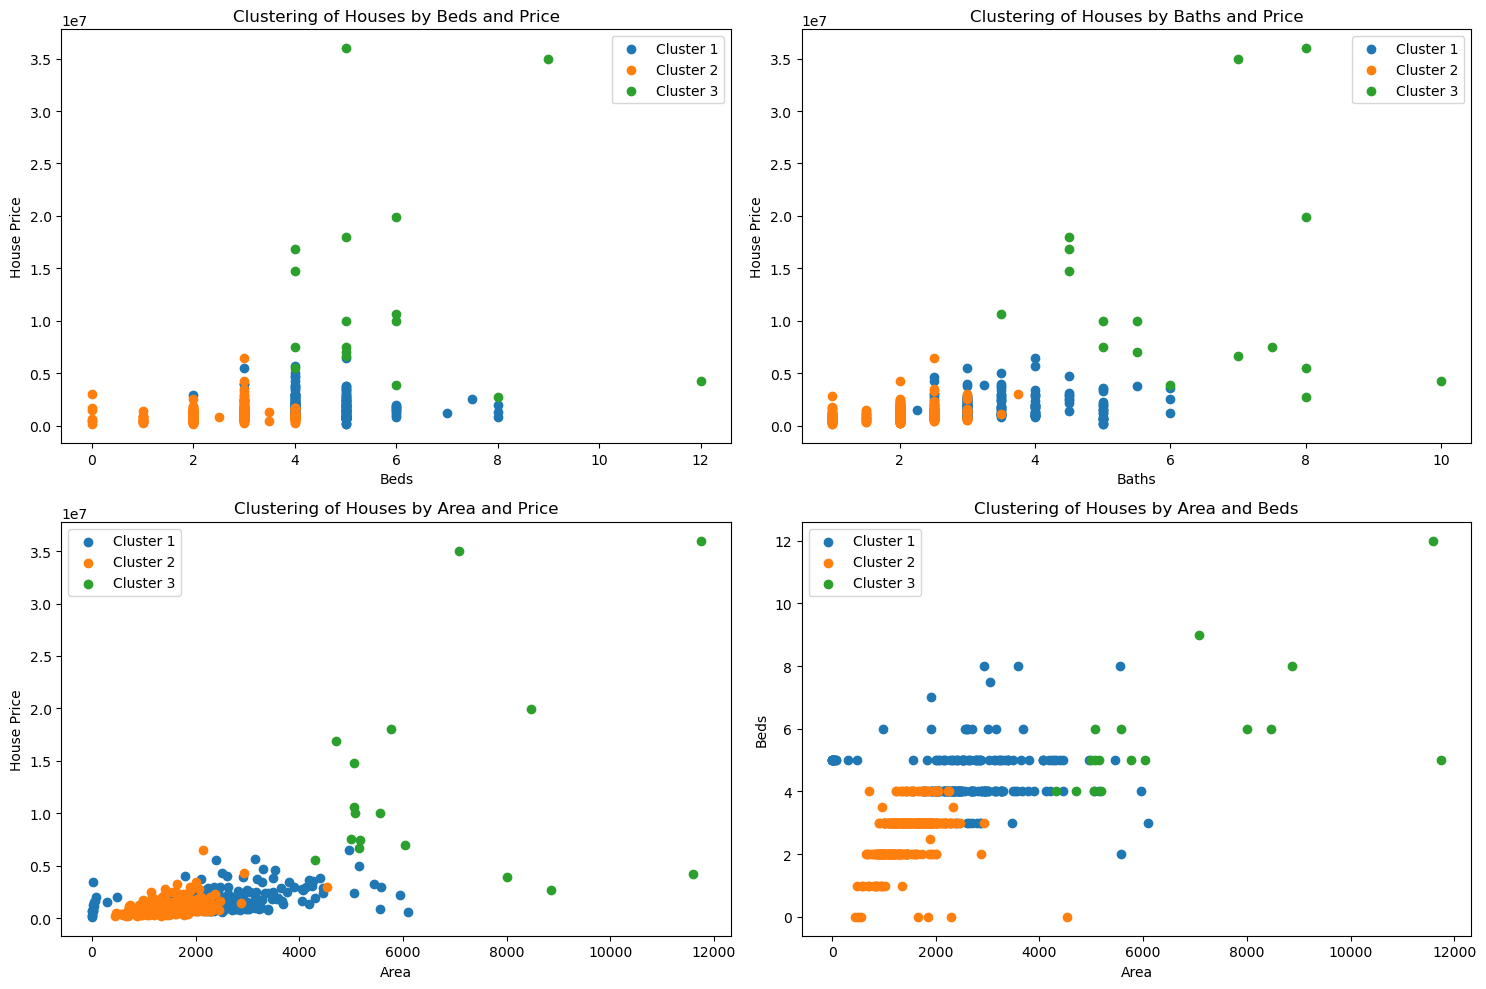

In [6]:
# Visualize the clustering results without cluster labels or stars for cluster centers
plt.figure(figsize=(15, 10))

# Plotting House_Price vs Beds
plt.subplot(2, 2, 1)
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Beds'], cluster_data['House_Price'], label=f'Cluster {cluster+1}')
plt.xlabel('Beds')
plt.ylabel('House Price')
plt.title('Clustering of Houses by Beds and Price')
plt.legend()

# Plotting Baths vs House_Price
plt.subplot(2, 2, 2)
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Baths'], cluster_data['House_Price'], label=f'Cluster {cluster+1}')
plt.xlabel('Baths')
plt.ylabel('House Price')
plt.title('Clustering of Houses by Baths and Price')
plt.legend()

# Plotting Area vs House_Price
plt.subplot(2, 2, 3)
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Area'], cluster_data['House_Price'], label=f'Cluster {cluster+1}')
plt.xlabel('Area')
plt.ylabel('House Price')
plt.title('Clustering of Houses by Area and Price')
plt.legend()

# Plotting Area vs Beds
plt.subplot(2, 2, 4)
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Area'], cluster_data['Beds'], label=f'Cluster {cluster+1}')
plt.xlabel('Area')
plt.ylabel('Beds')
plt.title('Clustering of Houses by Area and Beds')
plt.legend()

plt.tight_layout()
plt.show()

# Random Forest

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy import absolute

In [8]:
data= pd.read_csv('C:/Users/STSC/Desktop/SPRING SEM 2024/BAN 612(DATA ANALYTICS)/Project/Cleaned_DataFrame.csv')
data.columns = data.columns.str.strip()
data

,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,1499000,5.0,3.0,2140.00,6840.0,6790 Edgewater Ln,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/6790-Edgew...
1,375000,1.0,1.0,828.00,7346.0,1087 Murrieta Blvd #349,Livermore,94550,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/1087-Murri...
2,725000,2.0,1.0,1134.00,4500.0,22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,1549000,4.0,2.0,1450.00,4500.0,4474 Macbeth Cir,Fremont,94555,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/4474-Macbeth...
4,1199000,4.0,2.0,1561.00,7811.0,236 Chalmette Rd,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/236-Chalme...
...,...,...,...,...,...,...,...,...,...,...,...
533,849999,5.0,5.0,15.68,7346.0,443A Alexander Ln,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/44...
534,1999900,5.0,5.0,479.59,7346.0,20505 Coalinga Rd,Paicines,95043,sanBenito County,CA,https://www.redfin.com/CA/Paicines/20505-Coali...
535,699995,5.0,5.0,17.75,7346.0,363 Orchard Hill Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/36...
536,250000,5.0,5.0,0.71,7346.0,0 Airline Hwy,Tres Pinos,95075,sanBenito County,CA,https://www.redfin.com/CA/Tres-Pinos/Airline-H...


In [9]:
data = pd.get_dummies(data, columns=['County'], drop_first=True)

data = data.drop(['Street', 'City', 'Zip_Code', 'State', 'Url'], axis=1)

X = data.drop('House_Price', axis=1)

y = data['House_Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = RandomForestRegressor(n_estimators=30, random_state=30)

LL_rf = model.fit(X_train, y_train)

print('The training r_sq is: %.2f' % LL_rf.score(X_train, y_train))
ytrain_pred = LL_rf.predict(X_train)
print('The MAE is : %.2f' % mean_absolute_error(y_train, ytrain_pred))
print('The MSE is : %.2f' % mean_squared_error(y_train, ytrain_pred))
print('The RMSE is : %.2f' % np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print('The EVS is : %.2f' % explained_variance_score(y_train, ytrain_pred))

ytest_pred = LL_rf.predict(X_test)

print(ytest_pred[:10])

print('The testing r_sq is : %.2f' % r2_score(y_test, ytest_pred))
print('The testing r_sq is : %.2f' % LL_rf.score(X_test, y_test))
print('The MAE is : %.2f' % mean_absolute_error(y_test, ytest_pred))
print('The MSE is : %.2f' % mean_squared_error(y_test, ytest_pred))
print('The RMSE is : %.2f' % np.sqrt(mean_squared_error(y_test, ytest_pred)))
print('The EVS is : %.2f' % explained_variance_score(y_test, ytest_pred))

(322, 14) (216, 14) (322,) (216,)
The training r_sq is: 0.90
The MAE is : 263040.29
The MSE is : 652915426107.69
The RMSE is : 808031.82
The EVS is : 0.90
[  716999.33333333  1105366.66666667   776530.           724862.93333333
 11608300.          1590399.66666667  1520765.5          789166.33333333
   961350.          2472051.16666667]
The testing r_sq is : 0.26
The testing r_sq is : 0.26
The MAE is : 798709.37
The MSE is : 7004835661071.18
The RMSE is : 2646665.01
The EVS is : 0.27


In [11]:
score_train = cross_val_score(LL_rf, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(absolute(np.mean(score_train)))
print(np.mean(score_train))

5845605953830.295
-5845605953830.295


In [12]:
score_test = cross_val_score(LL_rf, X_test, y_test, scoring='neg_mean_squared_error', cv=10)
print(score_test)

[-3.56501725e+13 -3.28577693e+12 -1.39557392e+12 -5.72242893e+12
 -4.73817555e+11 -4.43645157e+12 -6.00137876e+12 -2.31492137e+13
 -4.25764347e+11 -6.82180327e+11]


In [13]:
print(absolute(np.mean(score_test)))

8122275855264.722


In [14]:
f_list = X.columns

f_importance = pd.Series(LL_rf.feature_importances_, index=f_list).sort_values(ascending=False)

print(f_importance)

Area                         0.427250
Beds                         0.385561
Lot                          0.065072
Baths                        0.052472
County_SanFrancisco Conty    0.021411
County_sanMateo Conty        0.011234
County_santaClara County     0.008275
County_sanBenito County      0.007685
County_Napa County           0.006605
County_Contra Costa Conty    0.004226
County_Marin Conty           0.003498
County_Sonoma County         0.002661
County_Solano Conty          0.002503
County_santaCruz County      0.001548
dtype: float64


In [15]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=30)

In [16]:
y_pred = model.predict(X_test)

y_pred = pd.DataFrame(y_pred, columns=['yPredict'])

print(y_pred)

         yPredict
0    7.169993e+05
1    1.105367e+06
2    7.765300e+05
3    7.248629e+05
4    1.160830e+07
..            ...
211  1.899092e+06
212  1.932321e+06
213  1.091933e+06
214  2.093710e+06
215  7.519200e+05

[216 rows x 1 columns]


In [17]:
print(y_test)

159      671226
397     1395000
323      220000
400      649000
237    36000000
         ...   
171     1425000
161     2488888
69       899000
261     1598000
91       678874
Name: House_Price, Length: 216, dtype: int64


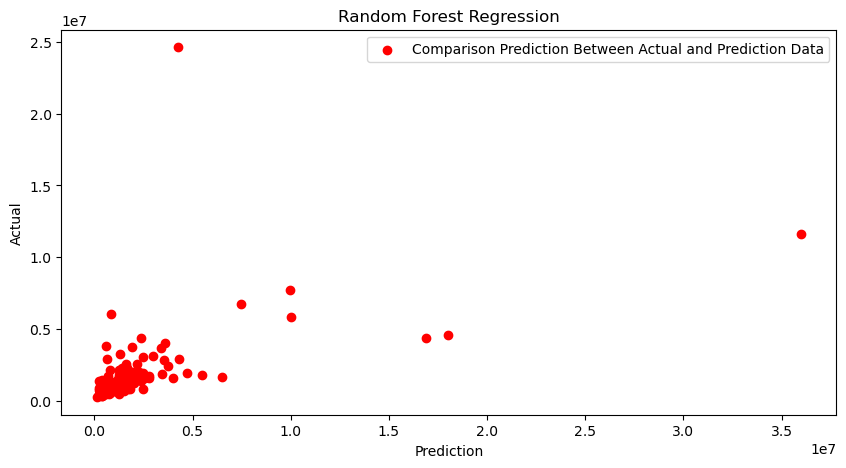

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color='red', label='Comparison Prediction Between Actual and Prediction Data')
plt.legend()
plt.title('Random Forest Regression')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()